<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #AC58FA;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Student Performance <br>
    (EDA / Machine learning)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Student Performance</div>**


## Goal
> ## EDA : Column Analysis, Column Correlation Analysis
> ## Modeling : Predicting Grades

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/predict-student-performance-dataset/data.csv')
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Socioeconomic Score,1388.0,0.552274,0.261272,0.10128,0.322118,0.545945,0.78961,0.99982
Study Hours,1388.0,4.560807,1.897581,0.80000,3.475000,3.900000,5.90000,10.00000
Sleep Hours,1388.0,8.047262,1.370700,4.80000,7.000000,8.400000,9.10000,10.00000
Attendance (%),1388.0,58.536023,11.675287,40.00000,49.000000,57.000000,66.00000,100.00000
Grades,1388.0,40.691643,9.467358,32.00000,34.000000,35.000000,47.00000,91.00000


In [5]:
df['Grades'].unique()

array([47., 35., 32., 34., 33., 51., 54., 39., 60., 46., 64., 52., 37.,
       45., 49., 43., 38., 88., 58., 61., 48., 66., 57., 41., 70., 50.,
       53., 40., 36., 55., 42., 59., 44., 62., 63., 67., 65., 56., 72.,
       76., 91., 73., 77., 80., 78., 69., 68., 74.])

### We can use the classification model by grading it by 'Grades' ! But I'll use a regression model.

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Socioeconomic Score    0.0
Study Hours            0.0
Sleep Hours            0.0
Attendance (%)         0.0
Grades                 0.0
dtype: float64

Duplicate Rows (%):
0.0


In [7]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.66286,9.8,6.2,78.0,64.0
1,0.13200,10.0,6.2,48.0,66.0
2,0.86138,9.7,6.1,89.0,67.0
3,0.20098,9.7,7.1,90.0,64.0
4,0.46981,9.7,5.0,70.0,63.0
5,0.94391,9.7,6.8,81.0,76.0
6,0.99361,9.9,6.6,57.0,91.0
7,0.57916,9.6,6.2,83.0,63.0
8,0.29328,9.6,7.0,85.0,64.0
9,0.33131,9.8,5.1,83.0,65.0


In [8]:
#for col in df.select_dtypes(include=['number']).columns:
#    Q1 = df[col].quantile(0.25)
#    Q3 = df[col].quantile(0.75)
#    IQR = Q3 - Q1
#    lower_b = Q1 - 1.5 * IQR
#    upper_b = Q3 + 1.5 * IQR
#    df = df[(df[col] >= lower_b) & (df[col] <= upper_b)]

#df.reset_index(drop=True, inplace=True)
#df.info()

### I don't remove outliers because outliers means upper and lower students

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

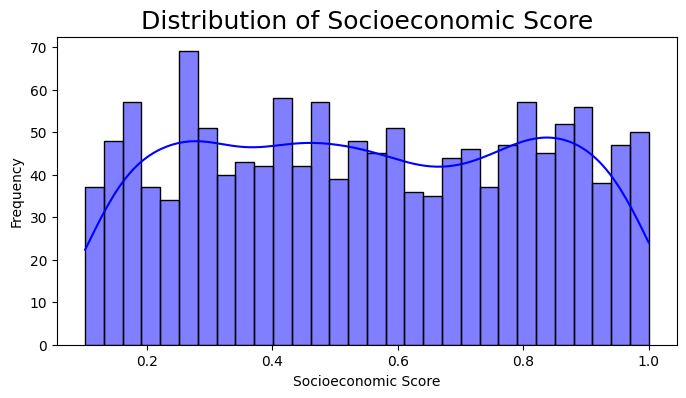

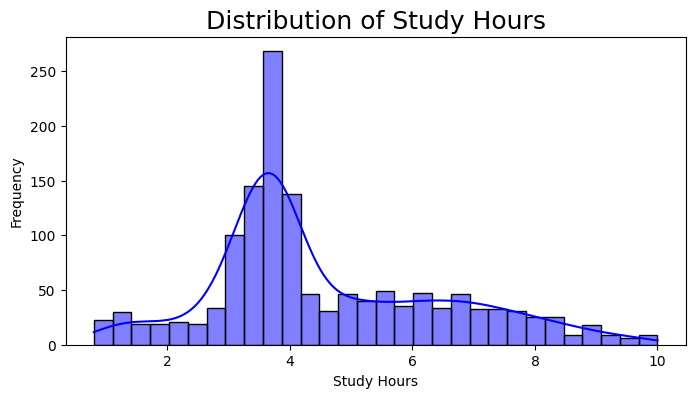

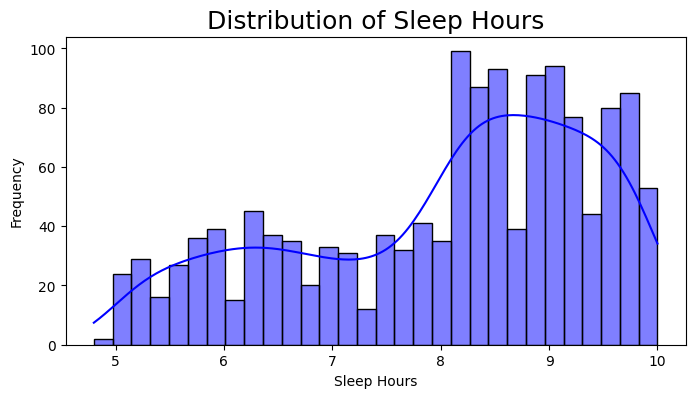

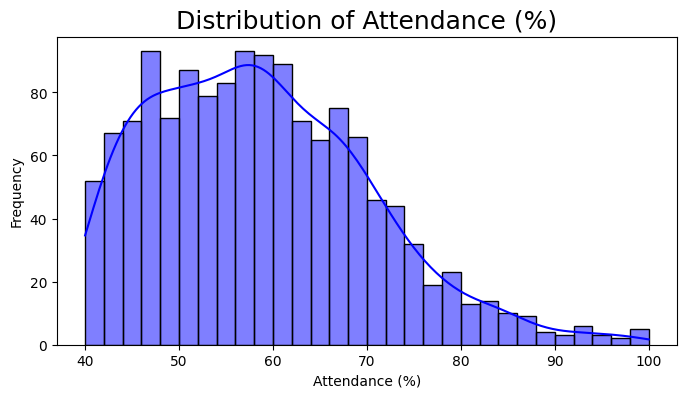

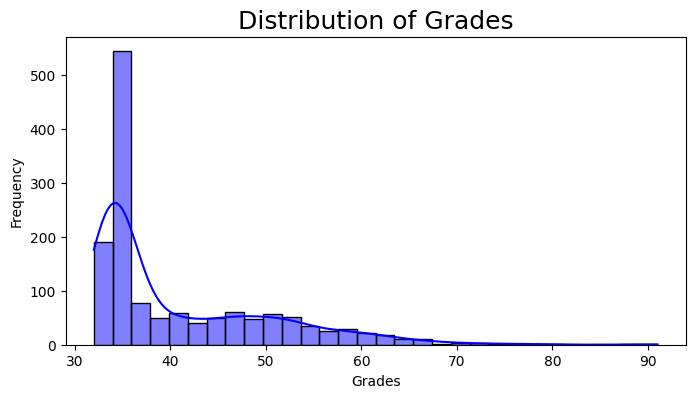

In [9]:
for col in df.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=18)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

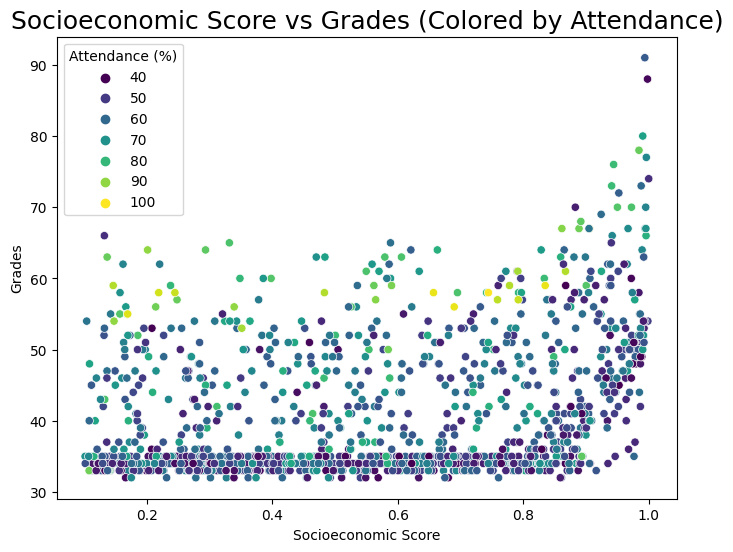

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Socioeconomic Score', y='Grades', hue='Attendance (%)', palette='viridis')
plt.title('Socioeconomic Score vs Grades (Colored by Attendance)', fontsize=18)
plt.xlabel('Socioeconomic Score')
plt.ylabel('Grades')
plt.legend(title='Attendance (%)')
plt.show()

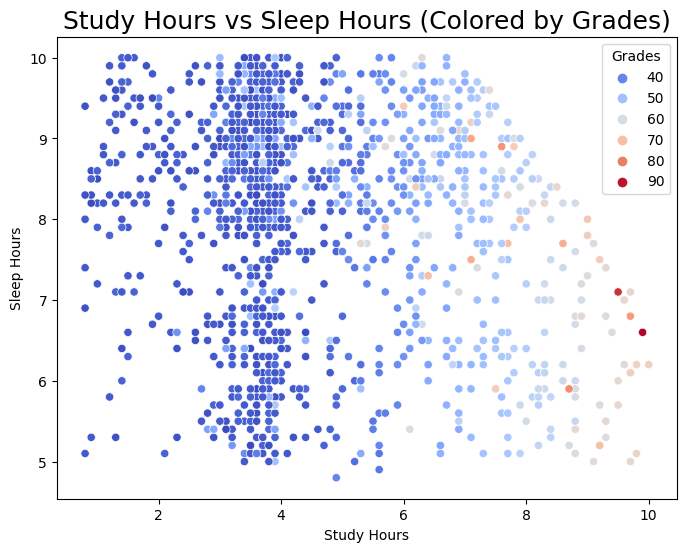

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Study Hours', y='Sleep Hours', hue='Grades', palette='coolwarm')
plt.title('Study Hours vs Sleep Hours (Colored by Grades)', fontsize=18)
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.legend(title='Grades')
plt.show()

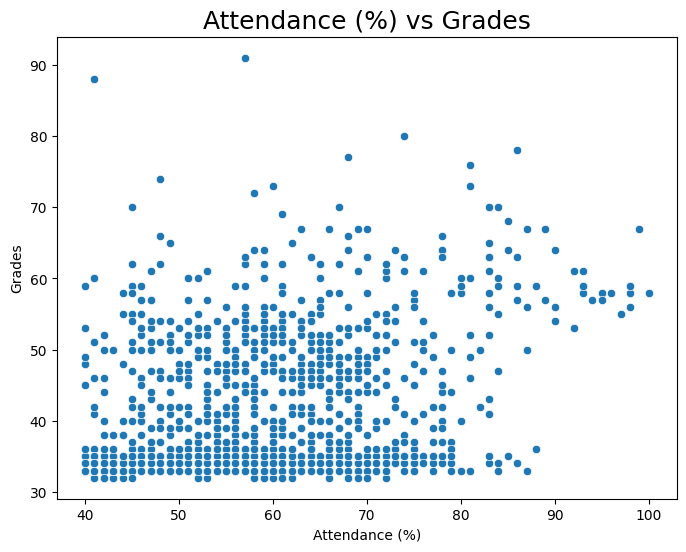

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Attendance (%)', y='Grades')
plt.title('Attendance (%) vs Grades', fontsize=18)
plt.xlabel('Attendance (%)')
plt.ylabel('Grades')
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysisn</div>

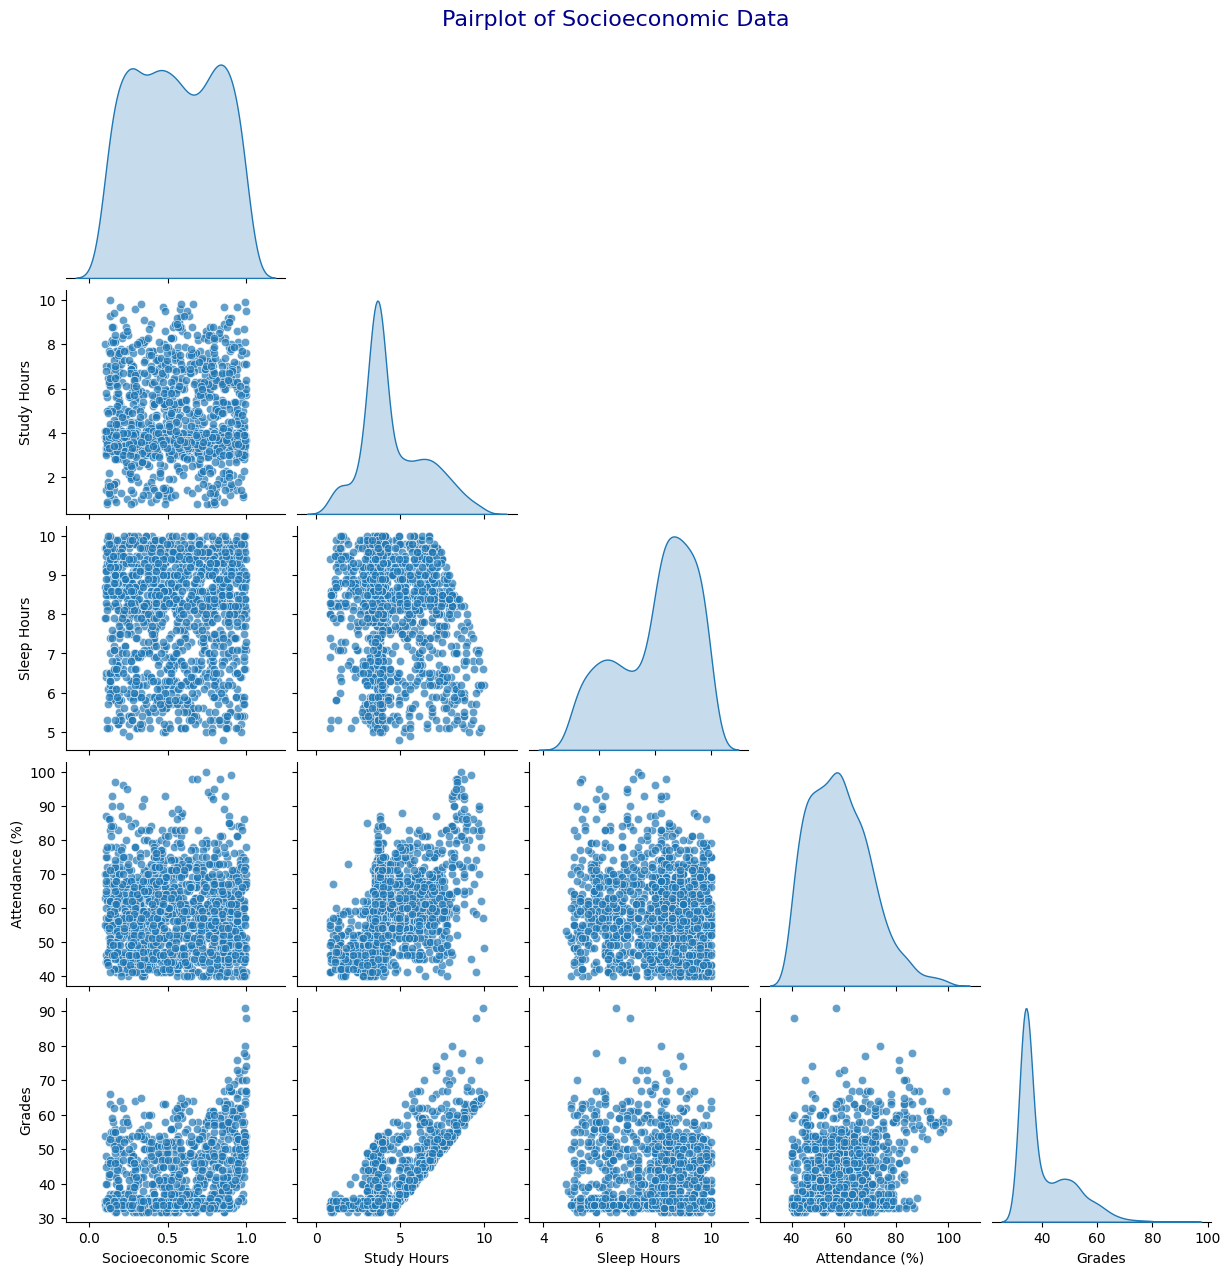

In [13]:
sns.pairplot(df, diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})

plt.suptitle('Pairplot of Socioeconomic Data', y=1.02, fontsize=16, color='darkblue')
plt.show()

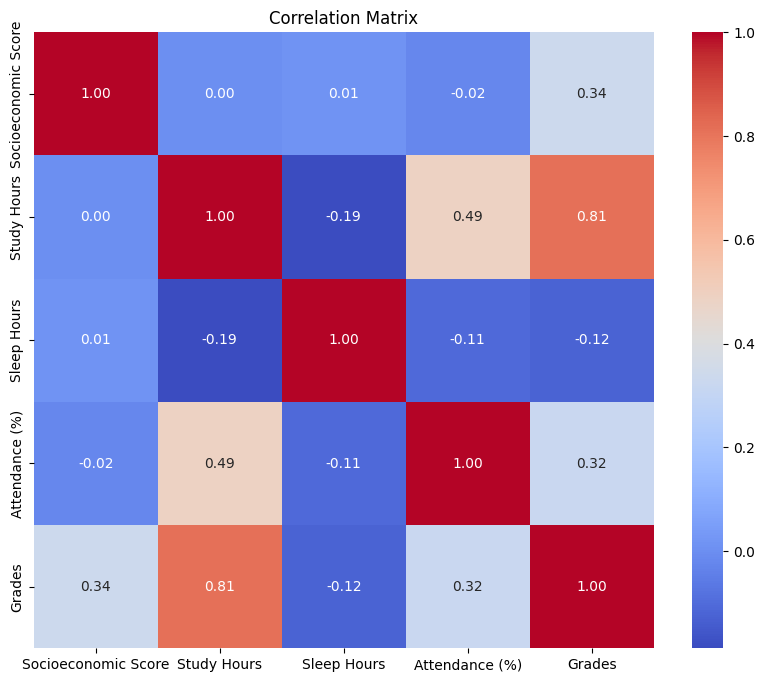

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of regression model performance</div>

In [15]:
X = df.drop('Grades', axis=1)
y = df['Grades']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=1e-4),  
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    mse = mean_squared_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)  
    
    return mse, r2

In [16]:
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

,MSE,R²
Random Forest,1.463378,0.980612
XGBoost,1.725410,0.977141
Decision Tree,3.597122,0.952343
Polynomial Regression,6.689728,0.911371
MLP Regressor,13.146870,0.825823
Bayesian Ridge,19.263727,0.744784
Linear Regression,19.272538,0.744667
ElasticNet,20.712144,0.725595
KNN,27.332534,0.637884
SVR,58.900806,0.219652


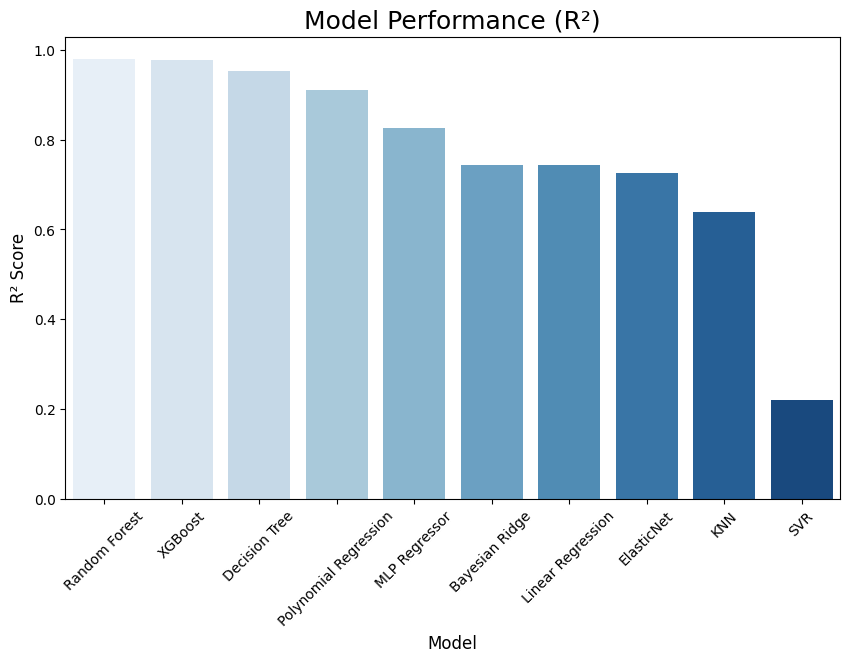

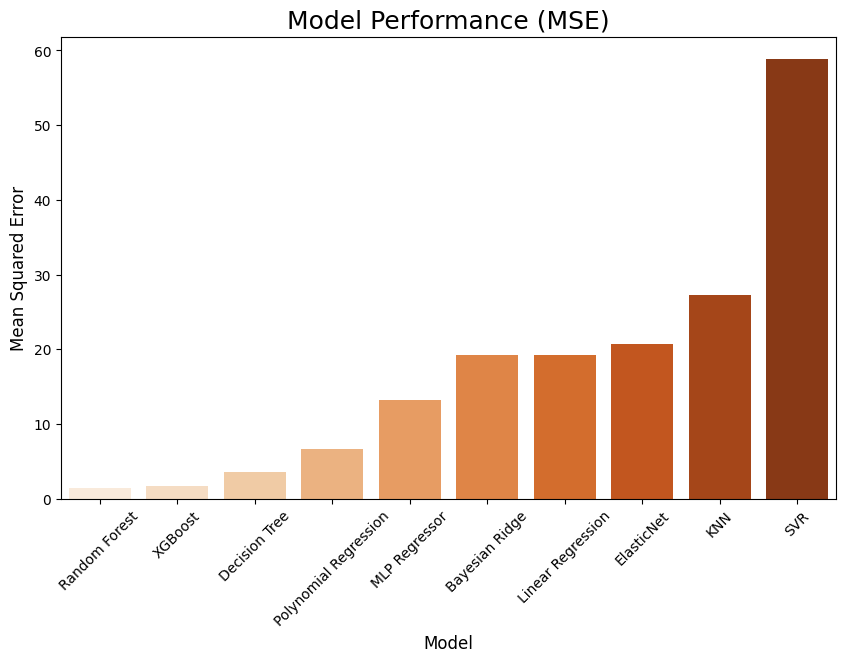

Best Model:
MSE    1.463378
R²     0.980612
Name: Random Forest, dtype: float64


In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R²", data=results_df, palette="Blues")
plt.title("Model Performance (R²)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="MSE", data=results_df, palette="Oranges")
plt.title("Model Performance (MSE)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=45)
plt.show()

best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Random Forest: Random Search</div>

In [18]:
rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50, 
    scoring='neg_mean_squared_error', 
    cv=5,  #
    verbose=2,
    random_state=42,
    n_jobs=-1  
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression Result: MSE = {mse}, R² = {r2}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
Random Forest Regression Result: MSE = 1.3829064194362781, R² = 0.9816785419912831


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>

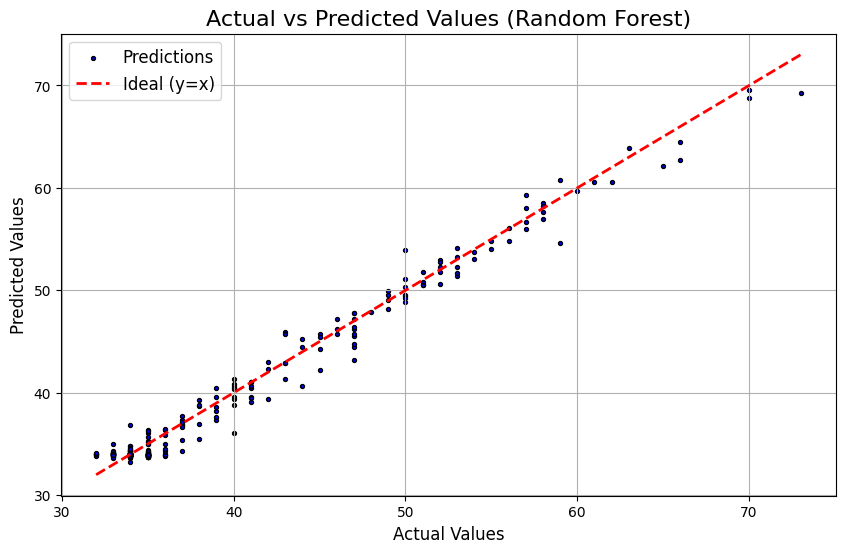

Random Forest Regression Result: MSE = 1.3829064194362781, R² = 0.9816785419912831


In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', s=8, edgecolor='black', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal (y=x)')

plt.title('Actual vs Predicted Values (Random Forest)', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression Result: MSE = {mse}, R² = {r2}')

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

### If you have any questions, please feel free to ask me a question and use the code freely !

<a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
<a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a>